<a href="https://www.kaggle.com/code/shashankfab/newnb?scriptVersionId=110797937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import os

main_lst = []
for dirname, _, filenames in os.walk("../input/dog-breed-identification-mlbootcamp/train"):
    for filename in filenames:
        main_lst.append(filename.split(".")[0])

lab = pd.read_csv('../input/dog-breed-identification-mlbootcamp/labels.csv')

lab_keys = lab["id"].tolist()

In [2]:
import time
from concurrent.futures import ThreadPoolExecutor

breed_arr = []

def handler(i):
    if i in lab_keys:
        id = i
        breed = lab[lab["id"] == id]["breed"].tolist()[0]
        breed_arr.append(breed)

with ThreadPoolExecutor(max_workers=2000) as executor:
    executor.map(handler, main_lst)

In [3]:
dog_breed_train_folder = "../input/dog-breed-identification-mlbootcamp/train"
dog_breed_test_folder = "../input/dog-breed-identification-mlbootcamp/test"

In [4]:
dog_breed_images_names = os.listdir(dog_breed_train_folder)
dog_breed_images_dir_file_path = [os.path.join(dog_breed_train_folder,i) for i in os.listdir(dog_breed_train_folder)]

In [5]:
dog_breed_images_names_without_jpg = [i.split(".")[0] for i in dog_breed_images_names]

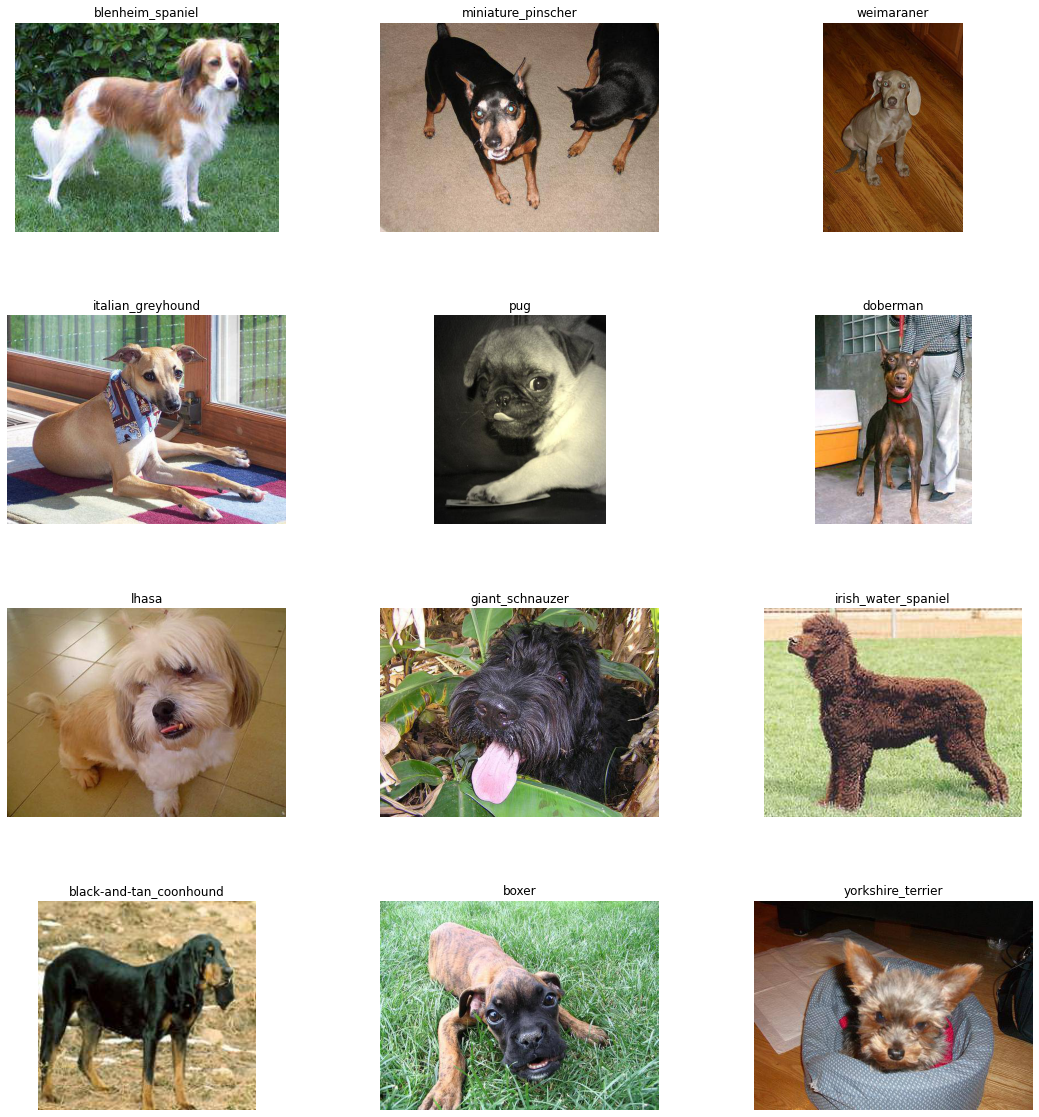

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import matplotlib.image as mpimg


fig = plt.figure(figsize=(20, 20))
columns = 3
rows = 4
axs = []
counter = 0

horse_human_images = dog_breed_images_dir_file_path[0:12]

for i in range(columns*rows):
    axs.append(fig.add_subplot(rows, columns, i+1) )
    
    id=dog_breed_images_names_without_jpg[counter]
    breed = lab[lab["id"] == id]["breed"].tolist()[0]
    
    axs[-1].set_title(breed)
    
    
#     axs[-1].imshow(np.array(Image.open(horse_human_images[i])))
    
    axs[-1].imshow(mpimg.imread(horse_human_images[i]))
    
    axs[-1].grid(False)
    axs[-1].axis("off")

    axs[-1].plot()
    counter+=1


fig.subplots_adjust(wspace=0.01, hspace=0.4)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

y_train=list(set(lab["breed"].to_list()))

obj = LabelEncoder()

y_train_img = obj.fit_transform(y_train)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop

In [9]:
# dog_breed_images_dir_file_path.shape

In [10]:
img_shape = (150,150,3)

In [11]:
import time
from concurrent.futures import ThreadPoolExecutor

dog_breed_X_data = []

def handler(i):
    img = Image.open(i)
    
    img = np.array(img,dtype="float32")
    img /= 255.0              

    dog_breed_X_data.append(tf.image.resize(img,[img_shape[0],img_shape[1]]))

with ThreadPoolExecutor(max_workers=5000) as executor:
    executor.map(handler,dog_breed_images_dir_file_path)

2022-11-12 16:14:07.149186: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
len(dog_breed_X_data)

10222

In [13]:
# data_mapper = {}
# for i,j in zip(y_train_img,breed_arr):
#     data_mapper[i] = j

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
a = mpimg.imread("../input/dog-breed-identification-mlbootcamp/train/000bec180eb18c7604dcecc8fe0dba07.jpg")
print(a.shape)

b = mpimg.imread("../input/dog-breed-identification-mlbootcamp/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")
print(b.shape)

(375, 500, 3)
(375, 500, 3)


In [16]:
from sklearn.preprocessing import LabelEncoder

y_train=list(set(lab["breed"].to_list()))
obj = LabelEncoder()
obj.fit(y_train)

LabelEncoder()

In [17]:
y_labels = obj.transform(breed_arr)

breed_arr = None

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf
import numpy as np

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
len(dog_breed_X_data) == len(y_labels)

True

In [21]:
(X_train,X_test,y_train,y_test) = train_test_split(dog_breed_X_data, y_labels, test_size = 0.2)

dog_breed_X_data = None

In [22]:
# X_train = X_train.astype('float32')         
# X_test = X_test.astype('float32')

# X_train = np.array(X_train)
# y_train = np.array(y_train)

In [23]:
# X_train = np.array(X_train)
# y_train = np.array(y_train)

In [24]:
print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

8177
8177
2045
2045


In [25]:
len(X_train) == len(y_train)

True

In [26]:
len(X_test) == len(y_test)

True

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop


model = Sequential([
    Conv2D(64,(3,3),activation="relu",input_shape=img_shape),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.4),
    Dense(units=400,activation="relu"),
    Dense(units=120,activation="softmax")
])

# model = Sequential([
#     Conv2D(64,(3,3),activation="relu",input_shape=img_shape),
#     MaxPooling2D(2,2),
#     Conv2D(64,(3,3),activation="relu"),
#     MaxPooling2D(2,2),
#     Conv2D(128,(3,3),activation="relu"),
#     MaxPooling2D(2,2),
#     Conv2D(128,(3,3),activation="relu"),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dropout(0.2),
#     Dense(units=800,activation="relu"),
#     Dense(units=120,activation="softmax")
# ])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 165888)            0         
_________________________________________________________________
dropout (Dropout)            (None, 165888)            0         
_________________________________________________________________
dense (Dense)                (None, 400)               6

In [29]:
model.compile(
#         optimizer='rmsprop',
        optimizer='adam',
    
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
)

In [30]:
len(X_test) 

2045

In [31]:
(y_test.shape)

(2045,)

In [32]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy'
)

In [34]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    steps_per_epoch=30,
    epochs=50,
    verbose=2,
    callbacks=[custom_early_stopping]
)

2022-11-12 16:15:05.777695: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
30/30 - 333s - loss: 5.5027 - accuracy: 0.0072 - val_loss: 4.7844 - val_accuracy: 0.0112


In [35]:
# Visualizing Training and Testing Accuracy and Loss

<Figure size 432x288 with 0 Axes>

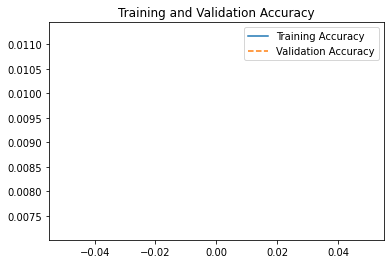

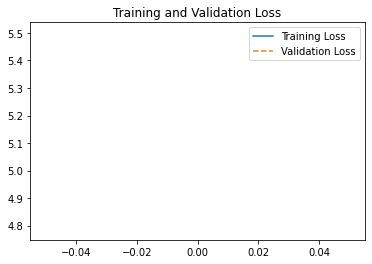

<Figure size 432x288 with 0 Axes>

In [36]:
accuracy=history.history["accuracy"]
loss=history.history["loss"]

val_accuracy=history.history["val_accuracy"]
val_loss=history.history["val_loss"]

epochs = range(len(accuracy))

plt.title("Training and Validation Accuracy")
plt.plot(epochs,accuracy,ls="-",label="Training Accuracy")
plt.plot(epochs,val_accuracy,ls="--",label="Validation Accuracy")
plt.legend()
plt.figure()

plt.title("Training and Validation Loss")
plt.plot(epochs,loss,ls="-",label="Training Loss")
plt.plot(epochs,val_loss,ls="--",label="Validation Loss")
plt.legend()
plt.figure()